[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/oreilly-japan/RecommenderSystems/blob/main/chapter5/colab/data_download.ipynb)

# Movielens 데이터 다운로드

In [1]:
# MovieLens 데이터셋을 data 디렉터리에 다운로드 한 뒤 압축을 푼다
!wget -nc --no-check-certificate https://files.grouplens.org/datasets/movielens/ml-10m.zip -P ../data
!unzip -n ../data/ml-10m.zip -d ../data/

--2022-12-27 04:41:56--  https://files.grouplens.org/datasets/movielens/ml-10m.zip
Resolving files.grouplens.org (files.grouplens.org)... 128.101.65.152
Connecting to files.grouplens.org (files.grouplens.org)|128.101.65.152|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 65566137 (63M) [application/zip]
Saving to: ‘../data/ml-10m.zip’

ml-10m.zip          100%[===================>]  62.53M  92.1MB/s    in 0.7s    

2022-12-27 04:41:57 (92.1 MB/s) - ‘../data/ml-10m.zip’ saved [65566137/65566137]

Archive:  ../data/ml-10m.zip
   creating: ../data/ml-10M100K/
  inflating: ../data/ml-10M100K/allbut.pl  
  inflating: ../data/ml-10M100K/movies.dat  
  inflating: ../data/ml-10M100K/ratings.dat  
  inflating: ../data/ml-10M100K/README.html  
  inflating: ../data/ml-10M100K/split_ratings.sh  
  inflating: ../data/ml-10M100K/tags.dat  


# Movielens 데이터 확인

In [2]:
import pandas as pd

In [3]:
# 영화 정보 로딩(10681작품)
# movieID와 제목만 사용
m_cols = ['movie_id', 'title', 'genre']
movies = pd.read_csv('../data/ml-10M100K/movies.dat', names=m_cols, sep='::' , encoding='latin-1', engine='python')

# genre를 list 형식으로 저장한다
movies['genre'] = movies.genre.apply(lambda x:x.split('|'))
movies.head()

,movie_id,title,genre
0,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]"
1,2,Jumanji (1995),"[Adventure, Children, Fantasy]"
2,3,Grumpier Old Men (1995),"[Comedy, Romance]"
3,4,Waiting to Exhale (1995),"[Comedy, Drama, Romance]"
4,5,Father of the Bride Part II (1995),[Comedy]


In [4]:
# 사용자가 부여한 영화의 태그 정보를 로딩한다
t_cols = ['user_id', 'movie_id', 'tag', 'timestamp']
user_tagged_movies = pd.read_csv('../data/ml-10M100K/tags.dat', names=t_cols, sep='::', engine='python')

# tag를 소문자로 바꾼다
user_tagged_movies['tag'] = user_tagged_movies['tag'].str.lower()

user_tagged_movies.head()

,user_id,movie_id,tag,timestamp
0,15,4973,excellent!,1215184630
1,20,1747,politics,1188263867
2,20,1747,satire,1188263867
3,20,2424,chick flick 212,1188263835
4,20,2424,hanks,1188263835


In [5]:
print(f'태그 종류={len(user_tagged_movies.tag.unique())}')
print(f'태그 레코드 수={len(user_tagged_movies)}')
print(f'태그가 붙어있는 영화 수={len(user_tagged_movies.movie_id.unique())}')

태그 종류=15241
태그 레코드 수=95580
태그가 붙어있는 영화 수=7601


In [6]:
# tag를 영화별로 list 형식으로 저장한다
movie_tags = user_tagged_movies.groupby('movie_id').agg({'tag':list})

# 태그 정보를 결합한다
movies = movies.merge(movie_tags, on='movie_id', how='left')

movies.head()

,movie_id,title,genre,tag
0,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]","[pixar, pixar, pixar, animation, pixar, animat..."
1,2,Jumanji (1995),"[Adventure, Children, Fantasy]","[for children, game, animals, joe johnston, ro..."
2,3,Grumpier Old Men (1995),"[Comedy, Romance]","[funniest movies, comedinha de velhinhos engra..."
3,4,Waiting to Exhale (1995),"[Comedy, Drama, Romance]",[girl movie]
4,5,Father of the Bride Part II (1995),[Comedy],"[steve martin, pregnancy, remake, steve martin..."


In [7]:
# 평갓값 데이터만 로딩한다
r_cols = ['user_id', 'movie_id', 'rating', 'timestamp']
ratings = pd.read_csv('../data/ml-10M100K/ratings.dat', names=r_cols, sep='::', engine='python')
ratings.head()


,user_id,movie_id,rating,timestamp
0,1,122,5.0,838985046
1,1,185,5.0,838983525
2,1,231,5.0,838983392
3,1,292,5.0,838983421
4,1,316,5.0,838983392


In [8]:
# 데이터량이 많으므로 사용자 수를 1000으로 줄여서 시험해본다
valid_user_ids = sorted(ratings.user_id.unique())[:1000]
ratings = ratings[ratings["user_id"].isin(valid_user_ids)]
ratings.head()

,user_id,movie_id,rating,timestamp
0,1,122,5.0,838985046
1,1,185,5.0,838983525
2,1,231,5.0,838983392
3,1,292,5.0,838983421
4,1,316,5.0,838983392


In [9]:
# 영화 데이터와 평가 데이터를 결합한다
movielens = ratings.merge(movies, on='movie_id')
movielens.head()

,user_id,movie_id,rating,timestamp,title,genre,tag
0,1,122,5.0,838985046,Boomerang (1992),"[Comedy, Romance]","[dating, nudity (topless - brief), can't remem..."
1,139,122,3.0,974302621,Boomerang (1992),"[Comedy, Romance]","[dating, nudity (topless - brief), can't remem..."
2,149,122,2.5,1112342322,Boomerang (1992),"[Comedy, Romance]","[dating, nudity (topless - brief), can't remem..."
3,182,122,3.0,943458784,Boomerang (1992),"[Comedy, Romance]","[dating, nudity (topless - brief), can't remem..."
4,215,122,4.5,1102493547,Boomerang (1992),"[Comedy, Romance]","[dating, nudity (topless - brief), can't remem..."


In [10]:
print(f'unique_users={len(movielens.user_id.unique())}, unique_movies={len(movielens.movie_id.unique())}')

unique_users=1000, unique_movies=6736


In [11]:
import numpy as np
# 사용자 정보
movielens.groupby('user_id').agg({'movie_id': len}).agg({'movie_id':[min, max, np.mean, len]})

,movie_id
min,20.00
max,1668.00
mean,132.83
len,1000.00


In [12]:
# 영화 정보
movielens.groupby('movie_id').agg({'user_id': len}).agg({'user_id':[min, max, np.mean, len]})

,user_id
min,1.000000
max,496.000000
mean,19.719418
len,6736.000000


In [13]:
print(f'평갓값 수={len(movielens)}')

평갓값 수=132830


In [14]:
movielens.groupby('rating').agg({'movie_id': len})

,movie_id
rating,
0.5,851
1.0,4847
1.5,1247
2.0,10292
2.5,3729
3.0,31706
3.5,9661
4.0,39917
4.5,6949


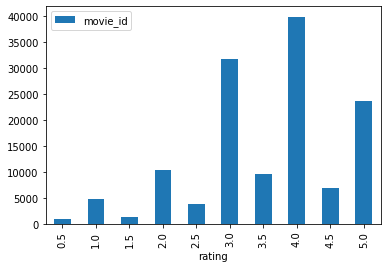

In [15]:
movielens.groupby('rating').agg({'movie_id': len}).plot.bar()

# 데이터 분할

In [16]:
# 학습용과 데이터용으로 데이터를 나눈다
# 각 사용자의 최근 5건의 영화를 평가용으로 사용하고, 나머지는 학습용으로 사용한다
# 우선, 각 사용자가 평가한 영화의 순서를 계산한다
# 최근 부여한 영화부터 순서를 부여한다(1에서 시작)

movielens['timestamp_rank'] = movielens.groupby(
    'user_id')['timestamp'].rank(ascending=False, method='first')
movielens_train = movielens[movielens['timestamp_rank'] > 5]
movielens_test = movielens[movielens['timestamp_rank']<= 5]